In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


simulation_results_csv_path = "../../simulations/Final_results/IRISE_23_30_SCINet_200_20_nopers_noclust_5_ala/results.csv"
n_clients = 23
BW_ADJUST = 0.3  # param of sns kdeplot

In [63]:
def get_best_test_metrics(cid: int, simulation_results_csv_path: str) -> dict:
    """
    Get the test metrics for the round with the highest validation r2 for a client.
    """
    df = pd.read_csv(simulation_results_csv_path)
    client_df = df[df["cid"] == cid]
    best_val_r2 = client_df[client_df["eval_data"] == "val"]["r2"].idxmax()
    best_val_round = client_df.loc[best_val_r2]["round"]
    best_test_metrics = client_df[
        (client_df["round"] == best_val_round) & (client_df["eval_data"] == "test")
    ]

    return {
        "round": best_test_metrics["round"].item(),
        "smape": best_test_metrics["smape"].item(),
        "mae": best_test_metrics["mae"].item(),
        "mse": best_test_metrics["mse"].item(),
        "rmse": best_test_metrics["rmse"].item(),
        "r2": best_test_metrics["r2"].item(),
    }

In [64]:
def print_indiv_client_metric(simulation_results_csv_path: str, n_clients: int) -> None:
    """
    Print the best test metrics for each client.
    """
    for cid in range(n_clients):
        best_results = get_best_test_metrics(cid, simulation_results_csv_path)
        print(
            f"Client {cid}:\tsmape={best_results['smape']:0.3f}\t mae={best_results['mae']:0.3f}\t mse={best_results['mse']:0.3f}\t rmse={best_results['rmse']:0.3f}\t r2={best_results['r2']:0.3f}"
        )


print_indiv_client_metric(simulation_results_csv_path, n_clients)

Client 0:	smape=39.166	 mae=0.052	 mse=0.006	 rmse=0.080	 r2=0.713
Client 1:	smape=66.972	 mae=0.007	 mse=0.000	 rmse=0.010	 r2=0.534
Client 2:	smape=51.168	 mae=0.028	 mse=0.001	 rmse=0.038	 r2=0.364
Client 3:	smape=60.787	 mae=0.045	 mse=0.006	 rmse=0.074	 r2=0.709
Client 4:	smape=36.461	 mae=0.011	 mse=0.000	 rmse=0.016	 r2=0.707
Client 5:	smape=62.606	 mae=0.004	 mse=0.000	 rmse=0.008	 r2=0.746
Client 6:	smape=46.511	 mae=0.059	 mse=0.009	 rmse=0.096	 r2=0.305
Client 7:	smape=85.945	 mae=0.005	 mse=0.000	 rmse=0.009	 r2=0.211
Client 8:	smape=39.157	 mae=0.042	 mse=0.006	 rmse=0.074	 r2=0.676
Client 9:	smape=44.744	 mae=0.054	 mse=0.007	 rmse=0.082	 r2=0.628
Client 10:	smape=66.009	 mae=0.060	 mse=0.010	 rmse=0.098	 r2=0.588
Client 11:	smape=65.070	 mae=0.007	 mse=0.000	 rmse=0.010	 r2=0.336
Client 12:	smape=64.011	 mae=0.005	 mse=0.001	 rmse=0.021	 r2=0.103
Client 13:	smape=46.136	 mae=0.052	 mse=0.006	 rmse=0.080	 r2=0.760
Client 14:	smape=48.060	 mae=0.054	 mse=0.007	 rmse=0.084	

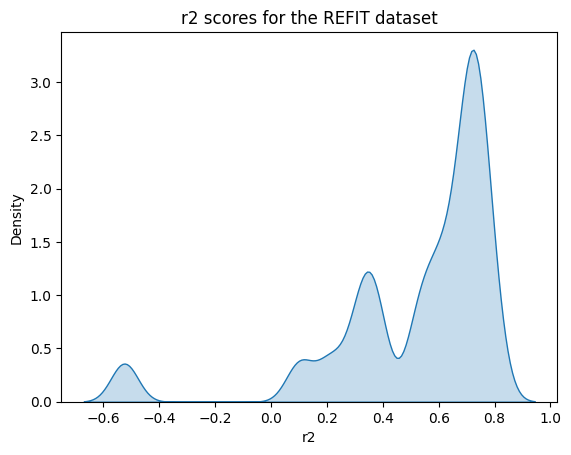

In [103]:
def plot_clients_metrics(
    simulation_results_csv_path: str,
    n_clients: int,
    metric="r2",
    dataset_name: str = "REFIT",
) -> None:
    """
    Plot the distribution of the best test metric for each client.
    """
    metrics = []
    for cid in range(n_clients):
        best_results = get_best_test_metrics(cid, simulation_results_csv_path)
        metrics.append(best_results[metric])
    sns.kdeplot(metrics, fill=True, bw_adjust=BW_ADJUST)
    plt.title(f"{metric} scores for the {dataset_name} dataset")
    plt.xlabel(f"{metric}")
    plt.ylabel("Density")
    plt.show()


plot_clients_metrics(simulation_results_csv_path, n_clients, metric="r2")

In [65]:
def get_avg_last_metrics(simulation_results_csv_path: str) -> dict:
    """
    Get the average of the last round test metrics across all clients.
    """
    df = pd.read_csv(simulation_results_csv_path)
    test_metrics = df[df["eval_data"] == "test"]
    last_round = test_metrics["round"].max()
    last_metrics = test_metrics[test_metrics["round"] == last_round]

    return {
        "smape": last_metrics["smape"].mean(),
        "mae": last_metrics["mae"].mean(),
        "mse": last_metrics["mse"].mean(),
        "rmse": last_metrics["rmse"].mean(),
        "r2": last_metrics["r2"].mean(),
    }


get_avg_last_metrics(simulation_results_csv_path)

{'smape': 51.73828485737676,
 'mae': 0.036524134019956585,
 'mse': 0.0046540684471318965,
 'rmse': 0.058047735881384274,
 'r2': 0.49953703647074493}

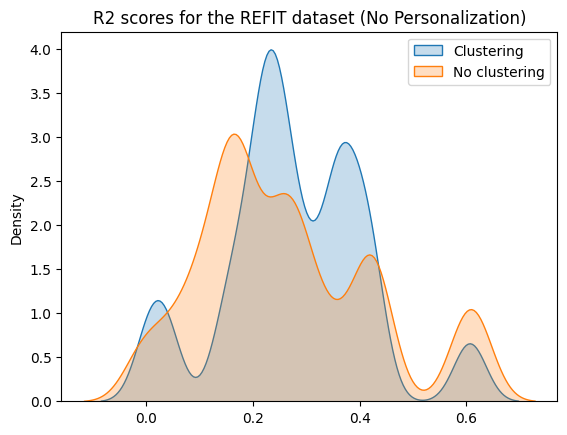

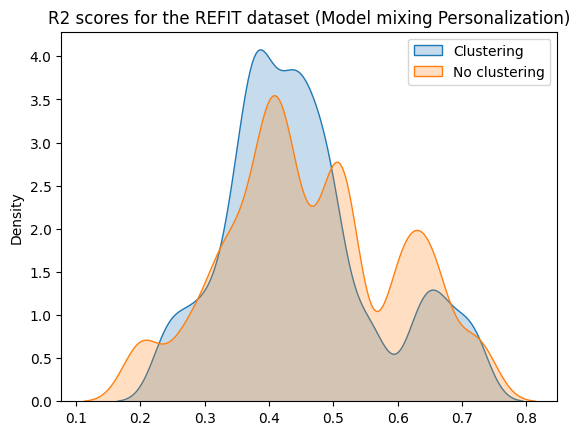

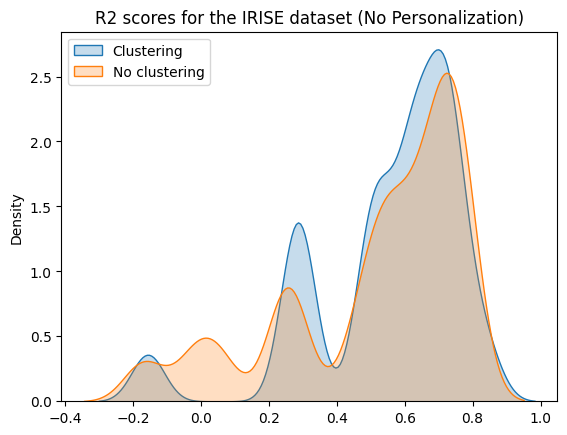

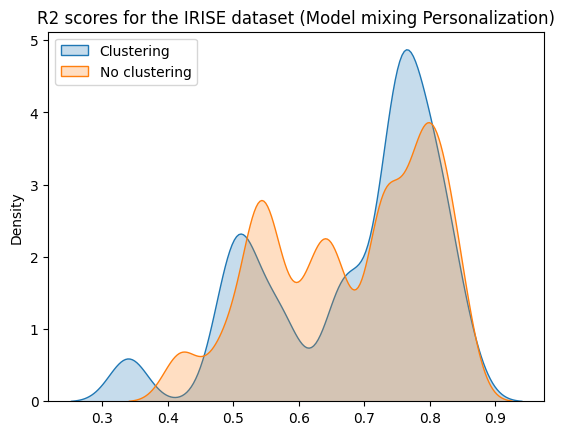

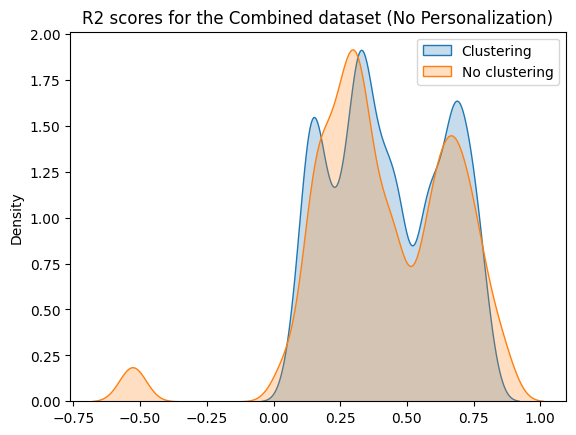

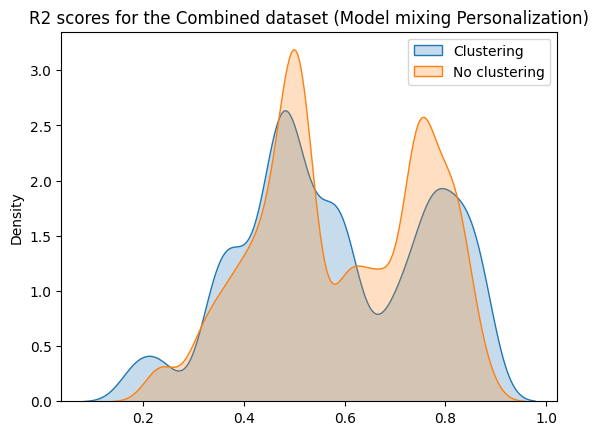

In [108]:
def get_results_path(
    dataset_name: str,
    nbr_clients: int,
    nbr_rounds: int,
    personalization: bool,
    cluster_clients: bool,
    n_clusters: int,
    ala_init: bool,
    model: str = "SCINet",
    epochs: int = 200,
    patience: int = 20,
):
    sim_name = f"{dataset_name}_{nbr_clients}_{nbr_rounds}_{model}_{epochs}_{patience}_{'pers' if personalization else 'nopers'}_{'clust' if cluster_clients else 'noclust'}_{n_clusters}"  # _{'ala' if ala_init else 'noala'}"
    simulation_results_csv_path = (
        f"../../simulations/Final_results/{sim_name}/results.csv"
    )
    return simulation_results_csv_path


def compare_clustering(
    dataset_name: str,
    nbr_clients: int,
    personalization: bool,
    n_clusters: int,
    ala_init: bool,
) -> None:
    results_with_cluster_path = get_results_path(
        dataset_name, nbr_clients, 40, personalization, True, n_clusters, ala_init
    )
    results_no_cluster_path = get_results_path(
        dataset_name, nbr_clients, 30, personalization, False, n_clusters, ala_init
    )

    r2_list_with_clust = []
    r2_list_no_clust = []
    for cid in range(nbr_clients):
        best_results_with_clust = get_best_test_metrics(cid, results_with_cluster_path)
        best_results_no_clust = get_best_test_metrics(cid, results_no_cluster_path)
        r2_list_with_clust.append(best_results_with_clust["r2"])
        r2_list_no_clust.append(best_results_no_clust["r2"])

    sns.kdeplot(
        r2_list_with_clust,
        fill=True,
        bw_adjust=BW_ADJUST,
        label="Clustering",
    )
    sns.kdeplot(
        r2_list_no_clust, 
        fill=True, 
        bw_adjust=BW_ADJUST, 
        label="No clustering")
    plt.legend()
    pers = (
        "Model mixing Personalization"
        if personalization
        else "ALA Personalization" if ala_init else "No Personalization"
    )
    plt.title(f"R2 scores for the {dataset_name} dataset ({pers})")
    plt.show()


compare_clustering(
    "REFIT", nbr_clients=20, personalization=False, n_clusters=3, ala_init=False
)
compare_clustering(
    "REFIT", nbr_clients=20, personalization=True, n_clusters=3, ala_init=False
)
compare_clustering(
    "IRISE", nbr_clients=23, personalization=False, n_clusters=5, ala_init=False
)
compare_clustering(
    "IRISE", nbr_clients=23, personalization=True, n_clusters=5, ala_init=False
)
compare_clustering(
    "Combined", nbr_clients=43, personalization=False, n_clusters=5, ala_init=False
)
compare_clustering(
    "Combined", nbr_clients=43, personalization=True, n_clusters=5, ala_init=False
)

In [114]:
import scipy.stats as stats


def compare_r2_scores(r2_list_model1, r2_list_model2):
    """
    Compare R2 scores for two models and check if the difference is statistically significant.
    """
    t_stat, p_value = stats.ttest_rel(r2_list_model1, r2_list_model2)

    print(f"T-statistic: {t_stat:0.3f}")
    print(f"P-value: {p_value:0.3f}")

    # Interpretation
    if p_value < 0.05:
        print("The improvement in R2 score IS statistically significant.")
    else:
        print("The improvement in R2 score IS NOT statistically significant.")

    mean_diff = sum(r2_list_model1) / len(r2_list_model1) - sum(r2_list_model2) / len(
        r2_list_model2
    )
    if mean_diff > 0:
        print(
            f"-> Second simulation had better R2 score by {mean_diff:0.4f} on average."
        )
    else:
        print(
            f"-> First simulation had better R2 score by {abs(mean_diff):0.4f} on average."
        )


def compare_simulations(
    sim1_csv_path: str,
    sim2_csv_path: str,
) -> None:
    r2_list_model1 = []
    r2_list_model2 = []
    for cid in range(n_clients):
        best_results_model1 = get_best_test_metrics(cid, sim1_csv_path)
        best_results_model2 = get_best_test_metrics(cid, sim2_csv_path)
        r2_list_model1.append(best_results_model1["r2"])
        r2_list_model2.append(best_results_model2["r2"])

    compare_r2_scores(r2_list_model1, r2_list_model2)


sim1_csv_path = get_results_path(
    "IRISE",
    nbr_clients=23,
    nbr_rounds=30,
    personalization=False,
    cluster_clients=False,
    n_clusters=5,
    ala_init=False,
)
sim2_csv_path = get_results_path(
    "IRISE",
    nbr_clients=23,
    nbr_rounds=40,
    personalization=False,
    cluster_clients=True,
    n_clusters=5,
    ala_init=False,
)

compare_simulations(sim1_csv_path, sim2_csv_path)

T-statistic: -1.045
P-value: 0.307
The improvement in R2 score IS NOT statistically significant.
-> First simulation had better R2 score by 0.0407 on average.
